# Performing EDA on lendingclub-issued-loans

### Written by : Chandrima chakrabarty (chakrabartychandrima91@gmail.com)

In [10]:
import pandas as pd #import librery

In [11]:
pd.set_option('display.max_columns', None) #display all columns

In [12]:
dff = pd.read_csv('lc_2016_2017.csv',low_memory=False)
dff.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,NaN,NaN,OWN,10000.0,Not Verified,Jun-2017,Current,n,NaN,credit_card,Credit card refinancing,148xx,NY,21.61,0,Sep-1985,1.0,NaN,NaN,4,0,3911.0,55.1,6,w,2029.91,2029.91,382.99,382.99,270.09,112.90,0.0,0.0,0.0,Dec-2017,77.08,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,3911.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,teacher,10+ years,MORTGAGE,94000.0,Not Verified,Jun-2017,Current,n,NaN,debt_consolidation,Debt consolidation,021xx,MA,25.61,0,Jun-1992,0.0,NaN,NaN,9,0,33752.0,105.8,26,w,14813.07,14813.07,2060.09,2060.09,1186.93,873.16,0.0,0.0,0.0,Dec-2017,360.95,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,234457.0,2.0,0.0,0.0,26.0,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0


In [13]:
dff.info() #get overall info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

In [14]:
#see the null value
obj = dff.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

id , 0
member_id , 759338
loan_amnt , 0
funded_amnt , 0
funded_amnt_inv , 0
term , 0
int_rate , 0
installment , 0
grade , 0
sub_grade , 0
emp_title , 50970
emp_length , 50363
home_ownership , 0
annual_inc , 0
verification_status , 0
issue_d , 0
loan_status , 0
pymnt_plan , 0
desc , 759321
purpose , 0
title , 23173
zip_code , 1
addr_state , 0
dti , 355
delinq_2yrs , 0
earliest_cr_line , 0
inq_last_6mths , 1
mths_since_last_delinq , 362705
mths_since_last_record , 618159
open_acc , 0
pub_rec , 0
revol_bal , 0
revol_util , 517
total_acc , 0
initial_list_status , 0
out_prncp , 0
out_prncp_inv , 0
total_pymnt , 0
total_pymnt_inv , 0
total_rec_prncp , 0
total_rec_int , 0
total_rec_late_fee , 0
recoveries , 0
collection_recovery_fee , 0
last_pymnt_d , 948
last_pymnt_amnt , 0
next_pymnt_d , 167915
last_credit_pull_d , 18
collections_12_mths_ex_med , 0
mths_since_last_major_derog , 544233
policy_code , 0
application_type , 0
annual_inc_joint , 725335
dti_joint , 725337
verification_status_joint

#### Based on NAN value, 0 valued column few columns will be removed in the next step step to reduce data dimension

In [15]:
#removing unnecessary columns
df = dff.drop(['id','member_id', 'verification_status', 'desc','title','zip_code','earliest_cr_line','inq_last_6mths', 'mths_since_last_record','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'out_prncp_inv', 'total_pymnt_inv', 'funded_amnt', 'funded_amnt_inv'], axis=1)

In [17]:
corr= df.corr() #see the overall correlation between all columns
#corr

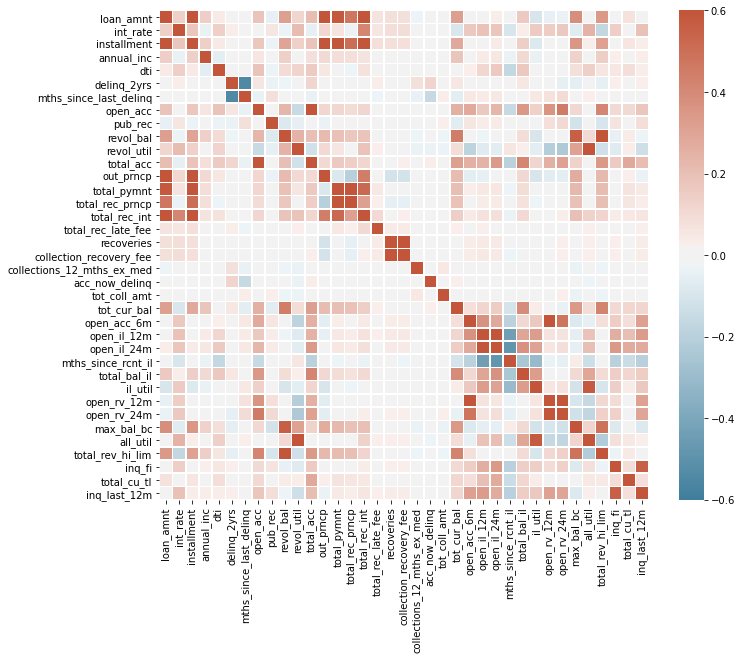

In [18]:
#visualizing the correlation between all the parameters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)  # Generate a custom diverging colormap
sns.heatmap(corr, cmap=cmap, vmax=0.6, center=0, vmin=-0.6,
            square=True, linewidths=.5)

Analysis : It is observed that Loan_amnt,installment, out_prncp, total payment, total_Rec_prncp, total_rec_int are highly positively correlated with each other with more than 0.6 correlation coefficient value.

###  Different loan status are analysing below

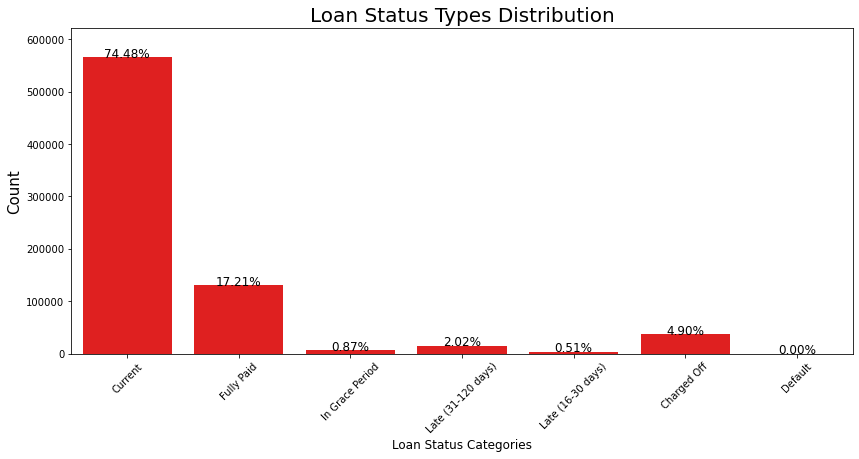

In [19]:
total = len(df)

plt.figure(figsize = (14,6))
g = sns.countplot(x="loan_status", data=df, color='red')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

Analysis : Loan status contains 7 types of loan in which current ongoing loan count is maximum and default loan in 2016-2017 is minimum.

### Loan amount distribution analysis

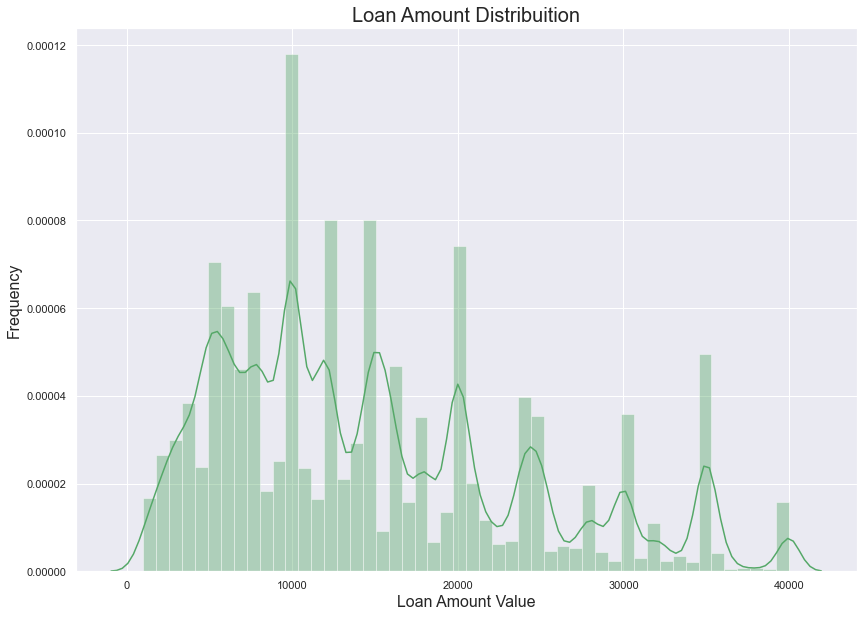

In [73]:
df['int_round'] = df['int_rate'].round(0).astype(int)
plt.figure(figsize=(14,10))

# Loan Amt plot
g = sns.distplot(df["loan_amnt"], color = 'g')
g.set_xlabel("Loan Amount Value", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)
g.set_title("Loan Amount Distribuition", fontsize=20)
plt.show()


Analysis : It is notted that a big part of the loans are values around USD 10,000. Also 10000-20000 USD bin is having the maximum frequncy among all.

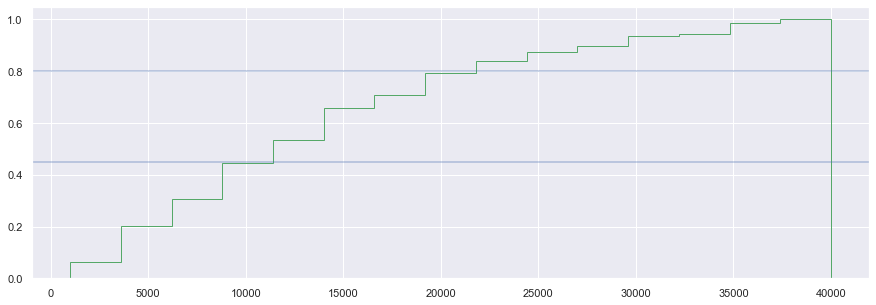

In [83]:
plt.hist(df["loan_amnt"], color = 'g',bins=15,cumulative=True,histtype='step',density=True)
plt.axhline(0.45,alpha=0.4)
plt.axhline(0.8,alpha=0.4)

### Interest distribution analysis

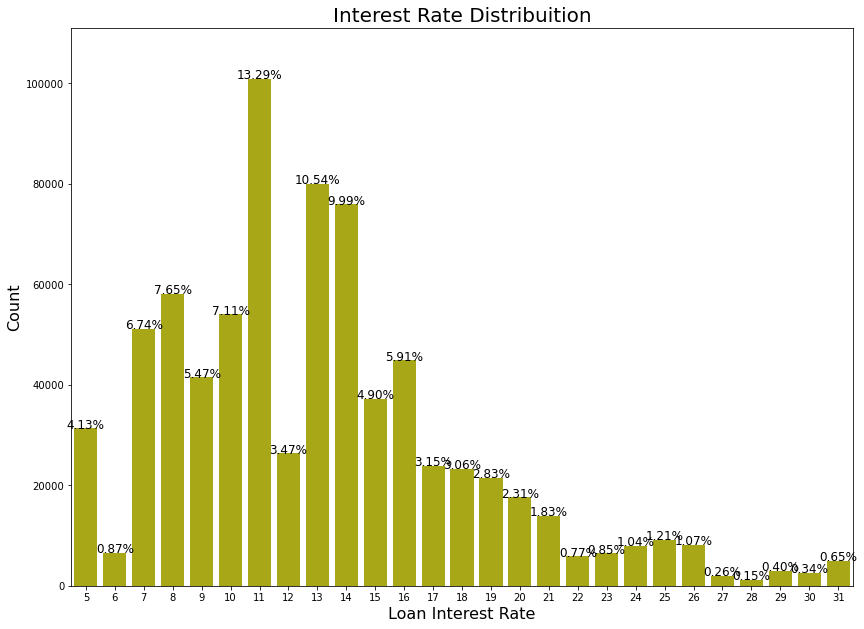

In [21]:
plt.figure(figsize=(14,10))
g1 = sns.countplot(x="int_round", data=df, color='y')
g1.set_xlabel("Loan Interest Rate", fontsize=16)
g1.set_ylabel("Count", fontsize=16)
g1.set_title("Interest Rate Distribuition", fontsize=20)
sizes=[] # Get highest values in y
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g1.set_ylim(0, max(sizes) * 1.10) # set y limit based on highest heights
plt.subplots_adjust(hspace = 0.4,top = 0.9)

Analysis : The Loan interest rate peak is shown in the range between 7% and 14%; where the loan interest rate 11% is having the highest count.

### Installment distribution analysis

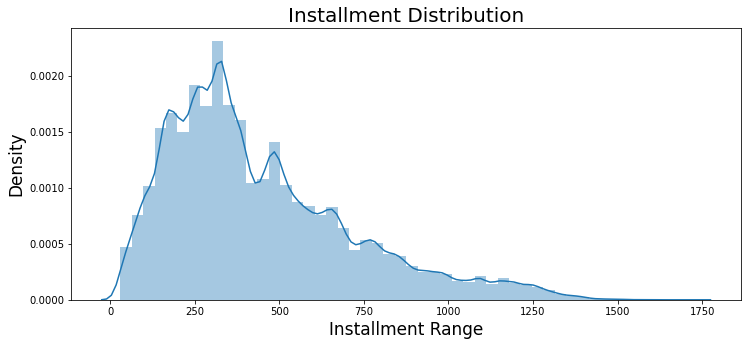

In [22]:
plt.figure(figsize=(12,5))
sns.distplot(df['installment'])
plt.title("Installment Distribution", fontsize=20)
plt.xlabel("Installment Range", fontsize=17)
plt.ylabel("Density", fontsize=17)
plt.show()

Analysis : The peak of our distribution is ~300 USD monthly.

### Client Purposes for Loan Credit

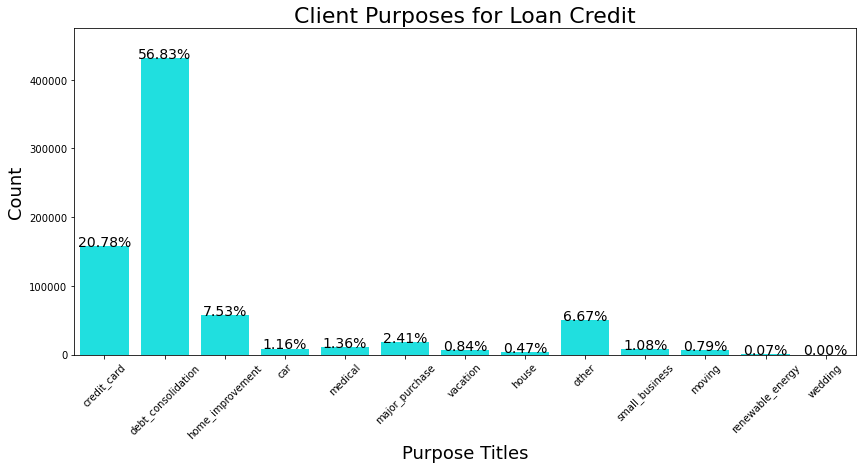

In [23]:
plt.figure(figsize=(14,6))
g = sns.countplot(x='purpose', data=df, color='cyan')
g.set_title("Client Purposes for Loan Credit", fontsize=22)
g.set_xlabel("Purpose Titles", fontsize=18)
g.set_ylabel('Count', fontsize=18)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.10)
g.set_xticklabels(g.get_xticklabels(),
                  rotation=45)

plt.show()

Analysis : 

56.8% of the Loans are to Debt Consolidation

20.78% are to pay Credit Card

7.53% to Home Improvement

and many others purpose's accumulated value is 14.79%

### Loan amount - Loan status

### Loan amount - Payment Plan

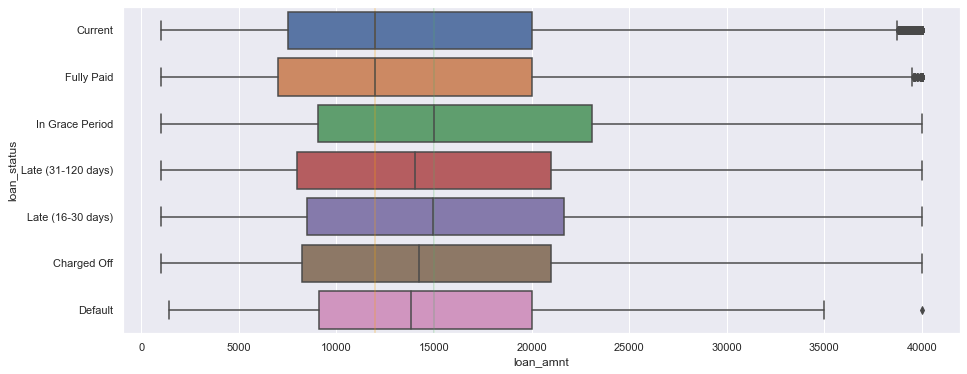

In [27]:
sns.set(rc={'figure.figsize':(15,6)})
sns.boxplot(x='loan_amnt', y='loan_status', data=df)
plt.axvline(15000,alpha=0.3,color='g')
plt.axvline(12000,alpha=0.3,color='orange')

In [121]:
df['loan_status'].value_counts()

Current               565523
Fully Paid            130718
Charged Off            37197
Late (31-120 days)     15354
In Grace Period         6634
Late (16-30 days)       3876
Default                   36
Name: loan_status, dtype: int64

In [53]:
bad_loan = [1 if (i=='Default') | (i =='Charged Off') else 0 for i in df['loan_status']]
#bad_loan.count(1)
df['bad_loan'] = bad_loan
df['bad_loan'].value_counts()

0    722105
1     37233
Name: bad_loan, dtype: int64

Analysis : The indivuals having loan status 'grace period' and 'Late (16-30 days)' shows higher median value of loan amount (~ 15000 USD). The indivuals having loan status 'Current' and 'Fully Paid' shows higher median value of loan amount (~ 12000 USD). Also total bad_loan amount is 37233.

### Application Type - Loan Amount

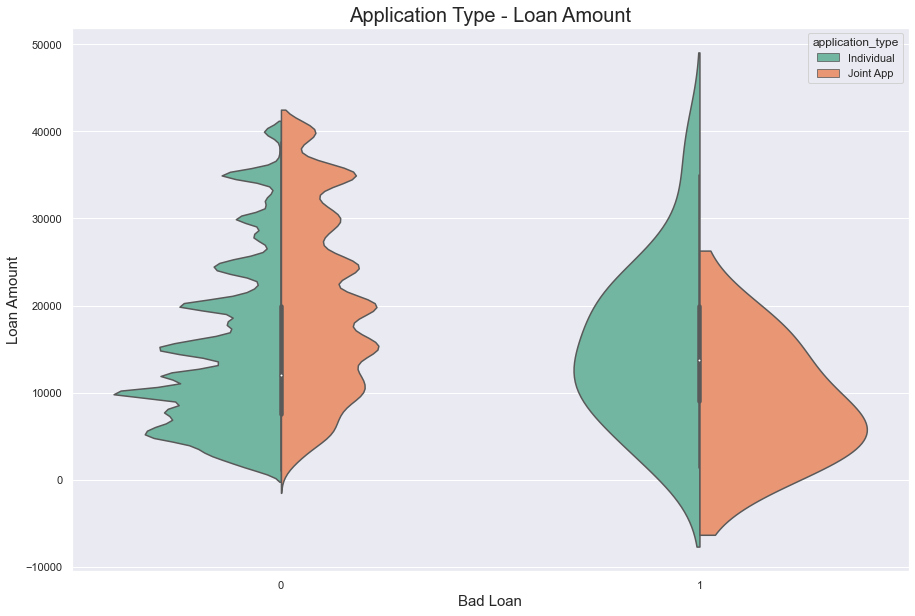

In [76]:
sns.set(rc={'figure.figsize':(15,10)})
sns.violinplot(x="bad_loan",y="loan_amnt",data=df, hue="application_type", split=True,palette='Set2')
plt.title("Application Type - Loan Amount", fontsize=20)
plt.xlabel("Bad Loan", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

Text(0.5, 1.0, 'Other Loan')

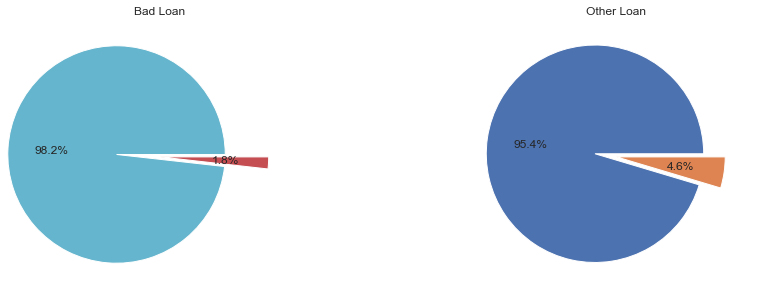

In [120]:
plt.subplot(1,2,1)
ff = df[df['bad_loan']==1][['application_type']]
explode=[0.4,0]
plt.pie(ff['application_type'].value_counts(),explode=explode,autopct='%1.1f%%',colors=['c','r']);
plt.title('Bad Loan')

plt.subplot(1,2,2)
ff = df[df['bad_loan']==0][['application_type']]
explode=[0.2,0]
plt.pie(ff['application_type'].value_counts(),autopct='%1.1f%%',explode=explode);
plt.title('Other Loan')

Analysis : So most of the defaulted loans were issued to individuals. Two or more people who take loans have lower chances of defaulting.

### Average Loan Amount - Grade

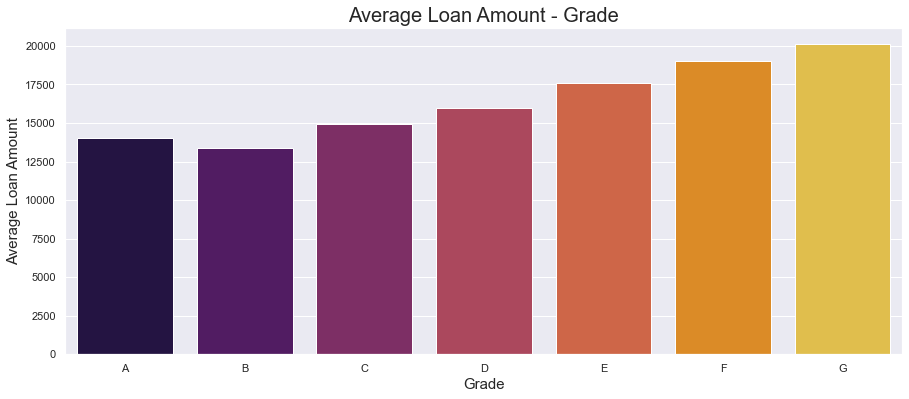

In [79]:
lg = df.groupby("grade").mean().reset_index()
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x='grade', y='loan_amnt', data=lg, palette='inferno')
plt.title("Average Loan Amount - Grade", fontsize=20)
plt.xlabel("Grade", fontsize=15)
plt.ylabel("Average Loan Amount", fontsize=15);

Analysis : Average loan amount of B grade loans is the least of all grades. Also from A to G grade there us a increase of issued loan amount is observed.

### Loan amount/ Month

<ipython-input-152-99f3fa65ada1>:1: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



Text(0.5, 1.0, 'Loan Amount / Months')

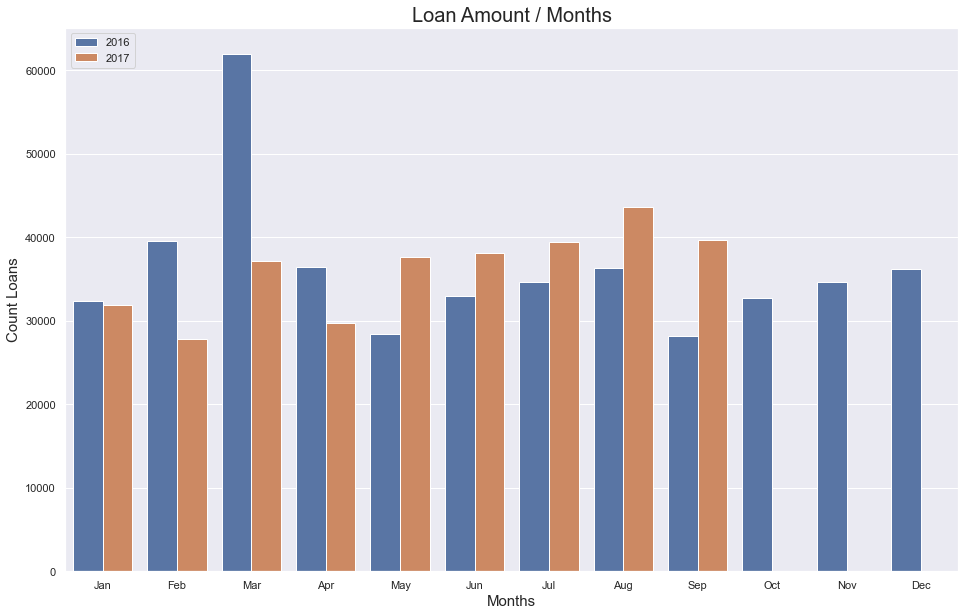

In [152]:
df['issue_month'], df['issue_year'] = df['issue_d'].str.split('-', 1).str
months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['issue_month'] = pd.Categorical(df['issue_month'],categories=months_order, ordered=True)
plt.figure(figsize = (16,10))
g = sns.countplot(x='issue_month', hue='issue_year', data=df[df['issue_year'].astype(int) >= 2012])
#g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count Loans", fontsize=15)
g.legend(loc='best')
g.set_title("Loan Amount / Months", fontsize=20)

### Home Ownership - Loan Amount Distribuition

Text(0, 0.5, 'Loan Amount')

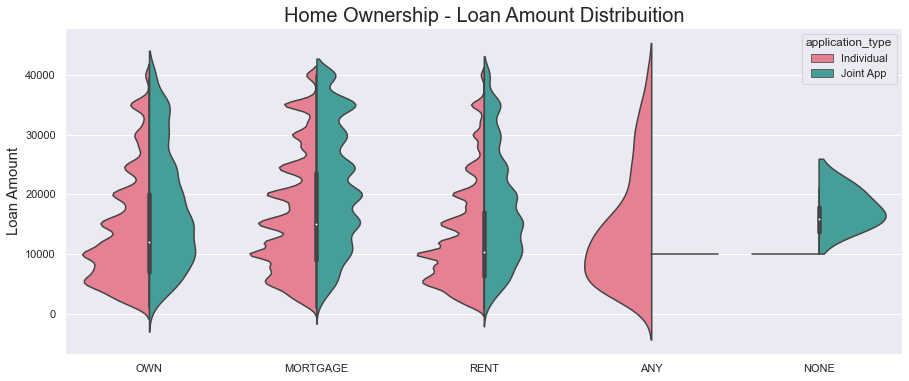

In [113]:
g = sns.violinplot(x="home_ownership",y="loan_amnt",data=df, kind="violin",split=True,palette="husl",hue="application_type")
g.set_title("Home Ownership - Loan Amount Distribuition", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

### Employement Length - Issued Loans

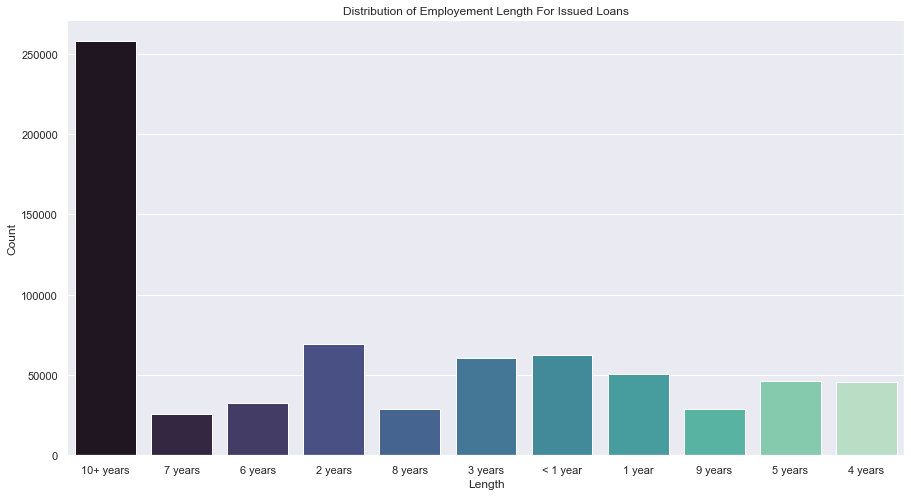

In [124]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(df['emp_length'],palette='mako')
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Employement Length For Issued Loans")
plt.show()

Analysis : Employes with 10+ years of experience are issued maximum number of loans.

### Grade count

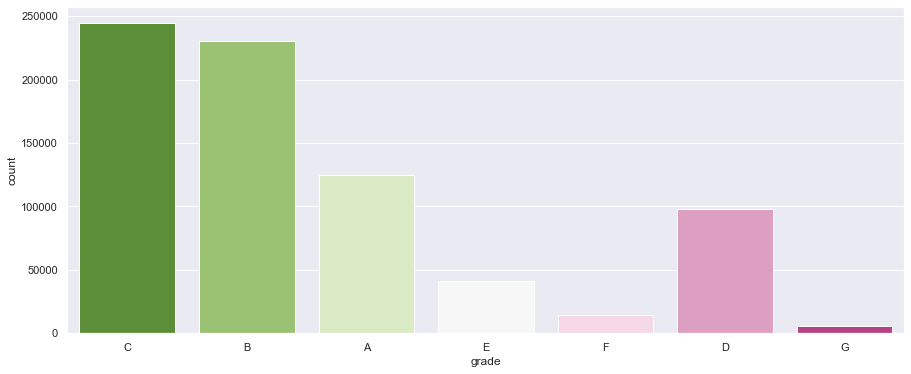

In [128]:
sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(df['grade'], palette='PiYG_r')

Analysis : Most of the loans are of C and B Grade.

### Interest rate - Grade

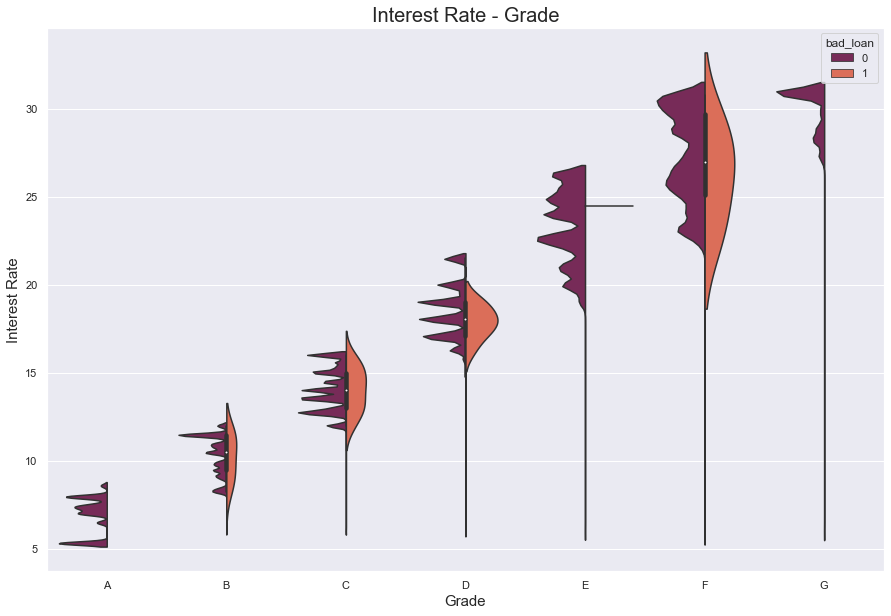

In [147]:
bad_loan = [1 if (i=='Default') | (i =='Charged Off') else 0 for i in df['loan_status']]
df['bad_loan'] = bad_loan
df['bad_loan'].value_counts()
sns.set(rc={'figure.figsize':(15,10)})
sns.violinplot(x="grade", y="int_rate", data=df, palette='rocket', order="ABCDEFG",hue='bad_loan',split=True)
plt.title("Interest Rate - Grade", fontsize=20)
plt.xlabel("Grade", fontsize=15)
plt.ylabel("Interest Rate", fontsize=15);

Analysis : As we shown before that the higher the loan amount, higher the interest rate.

### Loan Status - Interest Rate

Text(0.5, 1.0, 'Loan Status by Interest Rate')

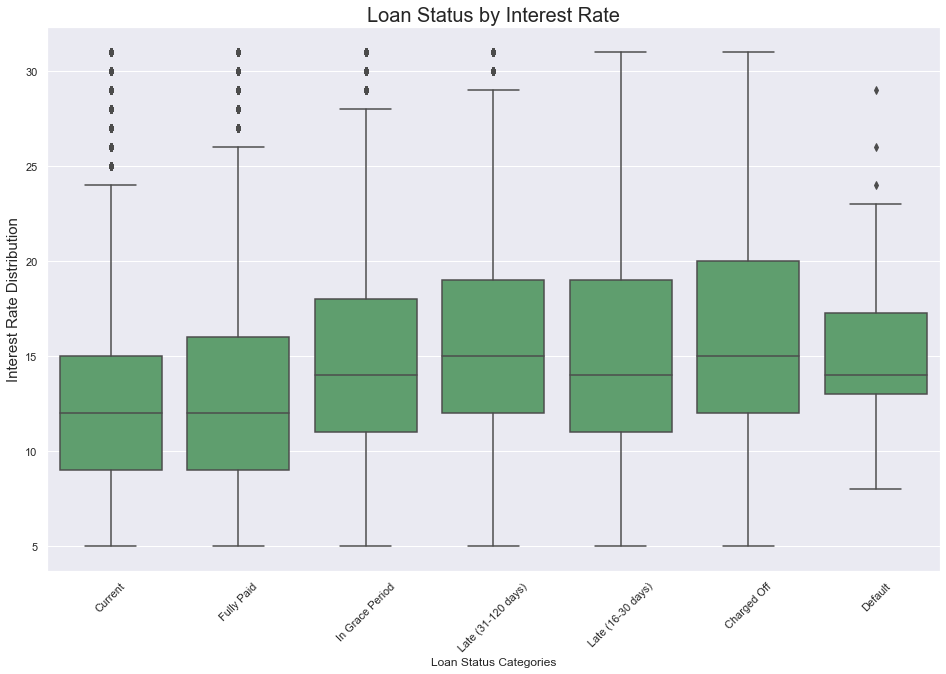

In [87]:
plt.figure(figsize = (16,10))
g1 = sns.boxplot(x="loan_status", y="int_round", data=df, color='g')
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("Loan Status Categories", fontsize=12)
g1.set_ylabel("Interest Rate Distribution", fontsize=15)
g1.set_title("Loan Status by Interest Rate", fontsize=20)


Analysis : Interest rate for 'Late(31-120 days)' and 'changed off' is highest (~15). 'Current' and 'Fully Paid' status is having the lowest interest rate among all.

### Loan Status / Grade

In [55]:
loan_grade = ['loan_status', 'grade']
cm = sns.light_palette("blue", as_cmap=True)
pd.crosstab(df[loan_grade[0]], df[loan_grade[1]]).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,1661,6776,11726,8367,5242,2583,842
Current,99645,179062,184289,66427,25228,7676,3196
Default,0,6,18,8,1,3,0
Fully Paid,21980,39536,39713,17713,7944,2874,958
In Grace Period,342,1538,2402,1353,626,256,117
Late (16-30 days),224,826,1379,797,404,168,78
Late (31-120 days),665,3063,5376,3293,1809,802,346


###  Interest Rate by Grade and Loan_status

In [56]:
loan_grade = ['loan_status', 'grade']
cm = sns.light_palette("blue", as_cmap=True)
round(pd.crosstab(df[loan_grade[0]], df[loan_grade[1]], 
            values=df['int_rate'], aggfunc='mean'),2).fillna(0).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,7.160000,10.410000,13.890000,18.230000,22.350000,25.960000,28.930000
Current,6.930000,10.400000,14.050000,18.490000,23.570000,27.760000,30.260000
Default,0.000000,10.170000,14.000000,17.880000,24.490000,26.100000,0.000000
Fully Paid,6.880000,10.280000,13.870000,18.310000,22.920000,26.770000,29.690000
In Grace Period,7.170000,10.540000,14.150000,18.500000,23.460000,27.390000,30.100000
Late (16-30 days),7.160000,10.540000,14.090000,18.490000,23.680000,27.890000,30.460000
Late (31-120 days),7.330000,10.500000,14.080000,18.520000,23.370000,27.630000,30.130000


### Applicatiob type- Interest Rate

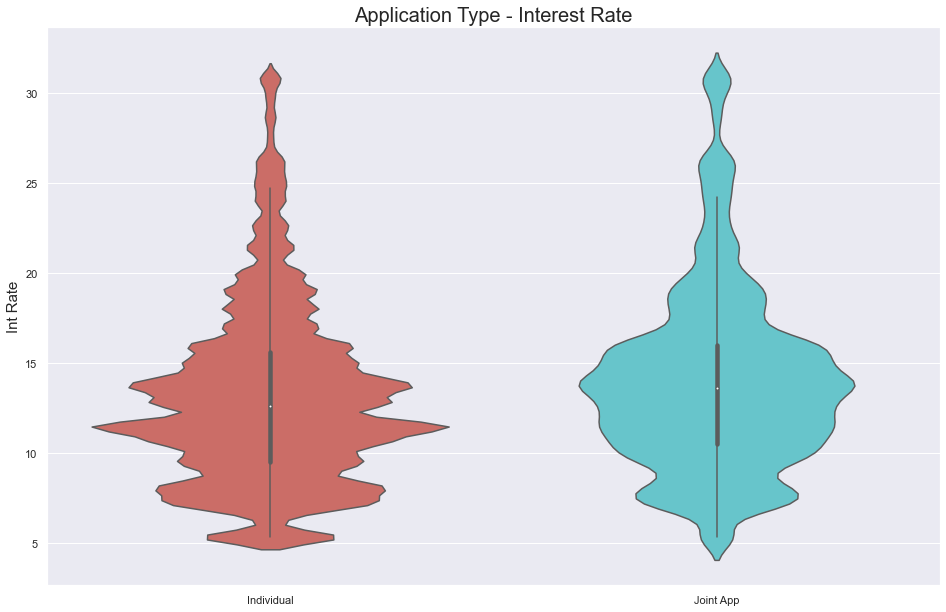

In [107]:
plt.figure(figsize = (16,10))
g1 = sns.violinplot(x="application_type", y="int_rate",data=df,
               palette="hls")
g1.set_title("Application Type - Interest Rate", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Int Rate", fontsize=15)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

Analysis : Joint Application has higher interest rate.

###  Homer Ownership - Interest Rate Distribuition

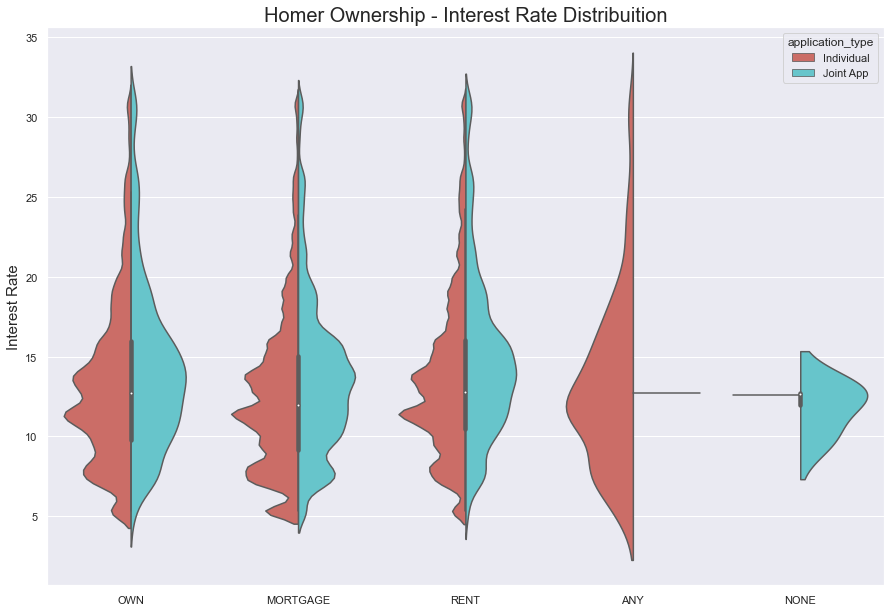

In [58]:
g1 = sns.violinplot(x="home_ownership",y="int_rate",data=df, kind="violin", split=True,palette="hls", hue="application_type")
g1.set_title("Homer Ownership - Interest Rate Distribuition", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Interest Rate", fontsize=15)

plt.subplots_adjust(hspace = 0.3,top = 0.9)

plt.show()

### Defaulted and Non-Defaulted Loan /State

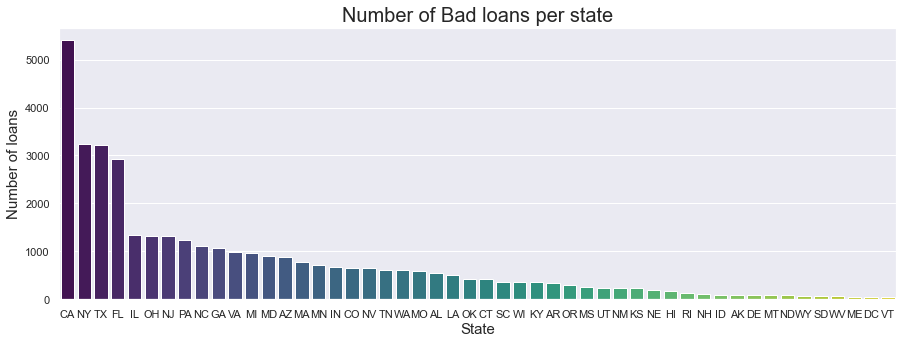

In [60]:
state_default = df[df['bad_loan']==1]['addr_state']

sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(state_default, order=state_default.value_counts().index, palette='viridis')
plt.xlabel('State',fontsize=15)
plt.ylabel('Number of loans',fontsize=15)
plt.title('Number of Bad loans per state',fontsize=20);

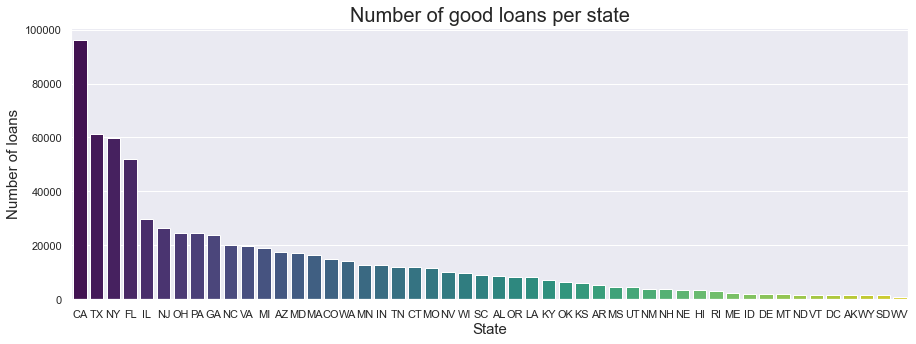

In [63]:
state_non_default = df[df['bad_loan']==0]['addr_state']

sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(state_non_default, order=state_non_default.value_counts().index, palette='viridis')
plt.xlabel('State',fontsize=15)
plt.ylabel('Number of loans',fontsize=15)
plt.title('Number of good loans per state',fontsize=20);

Analysis : California has the most number of bad-loans and good - loans out of all the states in US
States are not a distinguishing feature for predicting the bad loans.

### Installment / Loan Status

Text(0.5, 1.0, 'Installment Distribution / Loan Status')

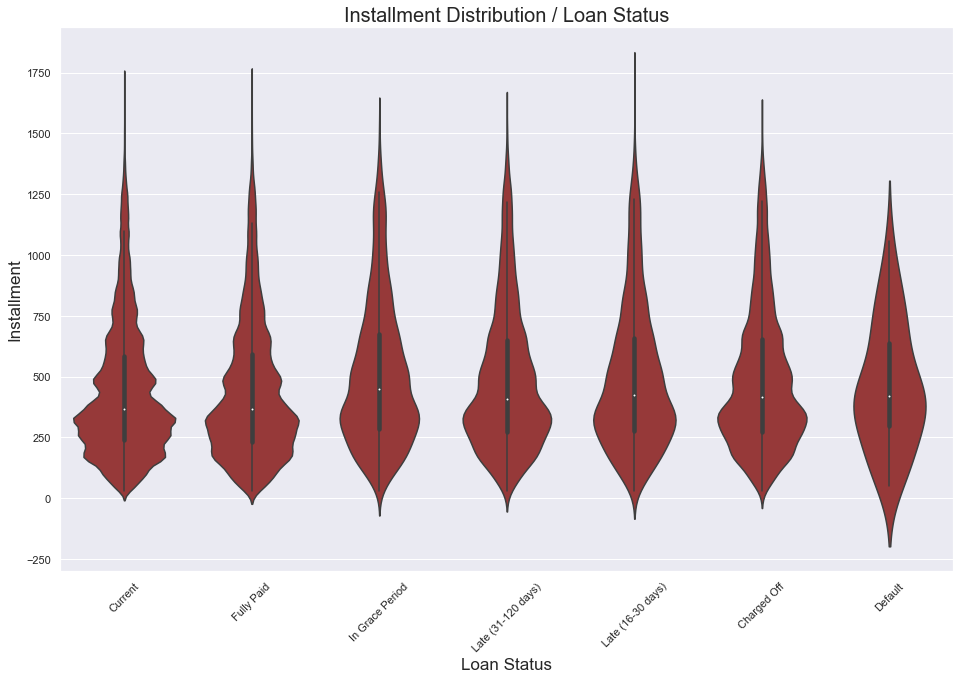

In [105]:
plt.figure(figsize = (16,10))
g = sns.violinplot(x='loan_status', y="installment",
                   data=df, color='brown')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status", fontsize=17)
g.set_ylabel("Installment", fontsize=17)
g.set_title("Installment Distribution / Loan Status", fontsize=20)

Analysis : Loan status in grace period has highest installment amount

### Employment count

In [119]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
trace0 = go.Bar(
    x = df.emp_title.value_counts()[:40].index.values,
    y = df.emp_title.value_counts()[:40].values,
    marker=dict(
        color=df.emp_title.value_counts()[:40].values
    ),
)

data = [trace0]

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Employment name'
    ),
    title='TOP 40 Employment Title'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='emp-title-bar')